In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string
import nltk
import gensim
from gensim import corpora
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

/anaconda2/lib/python2.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


[nltk_data] Downloading package wordnet to /Users/matt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/matt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/matt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('/liar_dataset/train.csv',sep=',')

In [3]:
data['the label'].unique()

array(['FALSE', 'half-true', 'mostly-true', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

In [4]:
data.describe()

barely true counts  false counts  half true counts  mostly true counts  \
count        10263.000000  10263.000000      10263.000000        10263.000000   
mean            11.549839     13.304394         17.168762           16.465166   
std             18.992224     24.132578         35.899983           36.202646   
min              0.000000      0.000000          0.000000            0.000000   
25%              0.000000      0.000000          0.000000            0.000000   
50%              2.000000      2.000000          3.000000            3.000000   
75%             12.000000     15.000000         13.000000           11.000000   
max             70.000000    114.000000        160.000000          163.000000   

       pants on fire counts  
count          10263.000000  
mean               6.202670  
std               16.121555  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                5.000000  
max              105.000000

In [5]:
data.head()

the ID of the statement ([ID].json)    the label  \
0                           2635.json        FALSE   
1                          10540.json    half-true   
2                            324.json  mostly-true   
3                           1123.json        FALSE   
4                           9028.json    half-true   

                                       the statement  \
0  Says the Annies List political group supports ...   
1  When did the decline of coal start? It started...   
2  Hillary Clinton agrees with John McCain "by vo...   
3  Health care reform legislation is likely to ma...   
4  The economic turnaround started at the end of ...   

                          the subject     the speaker the speaker's job title  \
0                            abortion    dwayne-bohac    State representative   
1  energy,history,job-accomplishments  scott-surovell          State delegate   
2                      foreign-policy    barack-obama               President   
3                         health-care    blog-posting                     NaN   
4                        economy,jobs   charlie-crist                     NaN   

  the state info the party affiliation  barely true counts  false counts  \
0          Texas            republican                 0.0           1.0   
1       Virginia              democrat                 0.0           0.0   
2       Illinois              democrat                70.0          71.0   
3            NaN                  none                 7.0          19.0   
4        Florida              democrat                15.0           9.0   

   half true counts  mostly true counts  pants on fire counts  \
0               0.0                 0.0                   0.0   
1               1.0                 1.0                   0.0   
2             160.0               163.0                   9.0   
3               3.0                 5.0                  44.0   
4              20.0                19.0                   2.0   

                 venue  
0             a mailer  
1      a floor speech.  
2               Denver  
3       a news release  
4  an interview on CNN

In [6]:
X = data.iloc[:, 2:].values
y = data.loc[:, ['the label']].values  

In [7]:
data.astype(str)

the ID of the statement ([ID].json)    the label  \
0                               2635.json        FALSE   
1                              10540.json    half-true   
2                                324.json  mostly-true   
3                               1123.json        FALSE   
4                               9028.json    half-true   
5                              12465.json         TRUE   
6                               2342.json  barely-true   
7                                153.json    half-true   
8                               5602.json    half-true   
9                               9741.json  mostly-true   
10                              7115.json  mostly-true   
11                              4148.json    half-true   
12                              5947.json        FALSE   
13                              8616.json  mostly-true   
14                              8705.json  barely-true   
15                             10683.json    half-true   
16                               620.json         TRUE   
17                              3863.json  barely-true   
18                             12372.json    half-true   
19                             12385.json  mostly-true   
20                             10173.json        FALSE   
21                              9867.json  mostly-true   
22                             12408.json  mostly-true   
23                              2673.json    half-true   
24                              7057.json  barely-true   
25                             10215.json        FALSE   
26                             12517.json  mostly-true   
27                              3910.json    half-true   
28                             11092.json        FALSE   
29                             12163.json  mostly-true   
...                                   ...          ...   
10239                           8119.json         TRUE   
10240                           1550.json         TRUE   
10241                           4077.json    half-true   
10242                          11207.json  barely-true   
10243                           4216.json        FALSE   
10244                           9365.json  barely-true   
10245                            981.json        FALSE   
10246                          11074.json    half-true   
10247                           1674.json        FALSE   
10248                           6032.json    half-true   
10249                           7388.json  mostly-true   
10250                          10166.json        FALSE   
10251                           8371.json         TRUE   
10252                           3744.json  mostly-true   
10253                           8262.json  barely-true   
10254                           1918.json    half-true   
10255                           4614.json  mostly-true   
10256                          13344.json   pants-fire   
10257                          13239.json  barely-true   
10258                           4423.json  mostly-true   
10259                          11018.json  barely-true   
10260                           2930.json    half-true   
10261                           4886.json    half-true   
10262                           4388.json   pants-fire   
10263                           1592.json    half-true   
10264                           5473.json  mostly-true   
10265                           3408.json  mostly-true   
10266                           3959.json    half-true   
10267                           2253.json        FALSE   
10268                           1155.json   pants-fire   

                                           the statement  \
0      Says the Annies List political group supports ...   
1      When did the decline of coal start? It started...   
2      Hillary Clinton agrees with John McCain "by vo...   
3      Health care reform legislation is likely to ma...   
4      The economic turnaround started at the end of ...   
5      The Chicago Bears have had more starting q

In [8]:
data.dropna(inplace=True)

In [9]:
special_char_list = [':', ';', '?', '}', ')', '{', '(', '$','%','...',':']
for special_char in special_char_list:
    data=data.replace(special_char, '')
    print(data)


      the ID of the statement ([ID].json)    the label  \
0                               2635.json        FALSE   
1                              10540.json    half-true   
2                                324.json  mostly-true   
5                              12465.json         TRUE   
7                                153.json    half-true   
9                               9741.json  mostly-true   
10                              7115.json  mostly-true   
11                              4148.json    half-true   
12                              5947.json        FALSE   
14                              8705.json  barely-true   
15                             10683.json    half-true   
16                               620.json         TRUE   
18                             12372.json    half-true   
19                             12385.json  mostly-true   
20                             10173.json        FALSE   
22                             12408.json  mostly-true   
24            

      the ID of the statement ([ID].json)    the label  \
0                               2635.json        FALSE   
1                              10540.json    half-true   
2                                324.json  mostly-true   
5                              12465.json         TRUE   
7                                153.json    half-true   
9                               9741.json  mostly-true   
10                              7115.json  mostly-true   
11                              4148.json    half-true   
12                              5947.json        FALSE   
14                              8705.json  barely-true   
15                             10683.json    half-true   
16                               620.json         TRUE   
18                             12372.json    half-true   
19                             12385.json  mostly-true   
20                             10173.json        FALSE   
22                             12408.json  mostly-true   
24            

      the ID of the statement ([ID].json)    the label  \
0                               2635.json        FALSE   
1                              10540.json    half-true   
2                                324.json  mostly-true   
5                              12465.json         TRUE   
7                                153.json    half-true   
9                               9741.json  mostly-true   
10                              7115.json  mostly-true   
11                              4148.json    half-true   
12                              5947.json        FALSE   
14                              8705.json  barely-true   
15                             10683.json    half-true   
16                               620.json         TRUE   
18                             12372.json    half-true   
19                             12385.json  mostly-true   
20                             10173.json        FALSE   
22                             12408.json  mostly-true   
24            

In [10]:
data = data.astype(str).apply(lambda x: x.str.lower())
data = data.astype(str).apply(lambda x: x.str.decode('utf8'))

In [11]:
data

the ID of the statement ([ID].json)    the label  \
0                               2635.json        false   
1                              10540.json    half-true   
2                                324.json  mostly-true   
5                              12465.json         true   
7                                153.json    half-true   
9                               9741.json  mostly-true   
10                              7115.json  mostly-true   
11                              4148.json    half-true   
12                              5947.json        false   
14                              8705.json  barely-true   
15                             10683.json    half-true   
16                               620.json         true   
18                             12372.json    half-true   
19                             12385.json  mostly-true   
20                             10173.json        false   
22                             12408.json  mostly-true   
24                              7057.json  barely-true   
25                             10215.json        false   
26                             12517.json  mostly-true   
27                              3910.json    half-true   
28                             11092.json        false   
29                             12163.json  mostly-true   
30                             13237.json         true   
31                              5383.json  barely-true   
32                              9727.json        false   
33                              8239.json  mostly-true   
34                             10121.json  mostly-true   
35                              7550.json         true   
36                              9018.json         true   
39                              8492.json         true   
...                                   ...          ...   
10219                           1991.json        false   
10220                            104.json         true   
10221                            612.json        false   
10222                           7347.json  mostly-true   
10223                           9841.json         true   
10224                           3321.json         true   
10225                           4387.json  mostly-true   
10226                           8112.json  barely-true   
10230                          12290.json  mostly-true   
10231                          11712.json        false   
10233                           7755.json    half-true   
10235                           7652.json   pants-fire   
10236                           6178.json        false   
10237                           6339.json    half-true   
10239                           8119.json         true   
10240                           1550.json         true   
10241                           4077.json    half-true   
10242                          11207.json  barely-true   
10243                           4216.json        false   
10244                           9365.json  barely-true   
10246                          11074.json    half-true   
10249                           7388.json  mostly-true   
10251                           8371.json         true   
10252                           3744.json  mostly-true   
10255                           4614.json  mostly-true   
10256                          13344.json   pants-fire   
10257                          13239.json  barely-true   
10259                          11018.json  barely-true   
10260                           2930.json    half-true   
10268                           1155.json   pants-fire   

                                           the statement  \
0      says the annies list political group supports ...   
1      when did the decline of coal start? it started...   
2      hillary clinton agrees with john mccain "by vo...   
5      the chicago bears have had more starting quart...   
7      i'm the only person on this stage who has work...   
9      says gop primary opponents glenn grothman 

In [12]:
data.dropna(inplace=True)

In [13]:
data.drop(columns=['the ID of the statement ([ID].json)'],inplace=True)

# LDA

In [14]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 

In [15]:
lemma = WordNetLemmatizer()

In [16]:
for w_index in data['the statement']:
    print(nltk.word_tokenize(w_index))

[u'says', u'the', u'annies', u'list', u'political', u'group', u'supports', u'third-trimester', u'abortions', u'on', u'demand', u'.']
[u'when', u'did', u'the', u'decline', u'of', u'coal', u'start', u'?', u'it', u'started', u'when', u'natural', u'gas', u'took', u'off', u'that', u'started', u'to', u'begin', u'in', u'(', u'president', u'george', u'w.', u')', u'bushs', u'administration', u'.']
[u'hillary', u'clinton', u'agrees', u'with', u'john', u'mccain', u'``', u'by', u'voting', u'to', u'give', u'george', u'bush', u'the', u'benefit', u'of', u'the', u'doubt', u'on', u'iran', u'.', u"''"]
[u'the', u'chicago', u'bears', u'have', u'had', u'more', u'starting', u'quarterbacks', u'in', u'the', u'last', u'10', u'years', u'than', u'the', u'total', u'number', u'of', u'tenured', u'(', u'uw', u')', u'faculty', u'fired', u'during', u'the', u'last', u'two', u'decades', u'.']
[u'i', u"'m", u'the', u'only', u'person', u'on', u'this', u'stage', u'who', u'has', u'worked', u'actively', u'just', u'last', u'

[u'here', u'in', u'california', u',', u'donald', u'trump', u'has', u'given', u'$', u'12,000', u'to', u'jerry', u'brown', u',', u'gavin', u'newsom', u'and', u'kamala', u'harris', u'.']
[u'on', u'support', u'for', u'the', u'auto', u'bailouts', u'.']
[u'when', u'republican', u'extremists', u'tried', u'to', u'take', u'away', u'abortion', u'rights', u'blake', u'rocap', u'stopped', u'them', u'.']
[u'says', u'obama', u'refuses', u'to', u'recognize', u'jerusalem', u'as', u'the', u'capital', u'of', u'israel', u'.']
[u'says', u'he', u'helped', u'to', u'draft', u'parts', u'of', u'the', u'dodd-frank', u'wall', u'street', u'reform', u'bill', u'.']
[u'says', u'income', u'tax', u'rates', u'under', u'eisenhower', u'were', u'as', u'high', u'as', u'90', u'percent', u'.']
[u'american', u'homeownership', u'rate', u'in', u'q2', u'2016', u'was', u'62.9', u'%', u'-', u'lowest', u'rate', u'in', u'51yrs', u'.']
[u'romneys', u'medicare', u'plan', u'was', u'estimated', u'to', u'cost', u'the', u'average', u'senio

[u'when', u'the', u'milwaukee', u'county', u'mental', u'health', u'facility', u'is', u'full', u',', u'cops', u'sit', u'out', u'there', u'in', u'their', u'squad', u'cars', u'with', u'a', u'mentally', u'ill', u'patient', u'and', u'sometimes', u'spend', u'an', u'entire', u'shift', u'out', u'there', u'doing', u'that', u'.']
[u'says', u'mitt', u'romney', u'is', u'proposing', u'a', u'tax', u'cut', u'that', u'gives', u'an', u'average', u'of', u'$', u'250,000', u'to', u'every', u'millionaire', u'in', u'this', u'country', u'.']
[u'the', u'budget', u'for', u'the', u'consumer', u'financial', u'protection', u'bureau', u'is', u'only', u'about', u'1', u'percent', u'of', u'the', u'amount', u'banks', u'generate', u'just', u'from', u'late', u'fees', u'and', u'overdraft', u'fees', u'.']
[u'says', u'that', u'rick', u'santorum', u'voted', u'for', u'the', u'unions', u'over', u'fedex', u'.']
[u'repeated', u'requests', u'for', u'additional', u'security', u'in', u'benghazi', u'were', u'routinely', u'denied', 

[u'thousands', u'of', u'westerners', u'and', u'americans', u'are', u'fighting', u'with', u'extremists', u'in', u'eastern', u'syria', u'and', u'iraq', u'.']
[u'says', u'hillary', u'clinton', u'was', u'literally', u'present', u'when', u'we', u'pressed', u'the', u'reset', u'button', u'with', u'russia', u'just', u'a', u'few', u'months', u'after', u'russia', u'had', u'invaded', u'georgia', u'.']
[u'our', u'national', u'debt', u'...', u'is', u'on', u'track', u'to', u'exceed', u'the', u'size', u'of', u'our', u'entire', u'economy', u'...', u'in', u'just', u'two', u'more', u'years', u'.']
[u'i', u'will', u'keep', u'taxes', u'low', u'and', u'cut', u'them', u'where', u'i', u'can', u'.', u'my', u'opponent', u'will', u'raise', u'them', u'.']
[u'says', u'challenger', u'dominic', u'chavez', u'is', u'a', u'rick', u'perry', u'republican', u'lobbyist', u'.']
[u'if', u'you', u'take', u'into', u'account', u'all', u'the', u'people', u'who', u'are', u'struggling', u'for', u'work', u',', u'or', u'have', u'ju

[u'the', u'arab', u'spring', u'drove', u'up', u'gas', u'prices', u'.']
[u'the', u'republican', u'budget', u'plan', u'says', u'that', u'10', u'years', u'from', u'now', u',', u'if', u'youre', u'a', u'65-year-old', u'whos', u'eligible', u'for', u'medicare', u',', u'you', u'should', u'have', u'to', u'pay', u'nearly', u'$', u'6,400', u'more', u'than', u'you', u'would', u'today', u'.']
[u'says', u'new', u'york', u'has', u'bureaucrats', u'telling', u'you', u'whether', u'you', u'can', u'even', u'drink', u'a', u'big', u'gulp', u'.']
[u'chris', u'christie', u'cut', u'equal', u'pay', u'for', u'women', u',', u'calling', u'it', u'senseless', u'bureaucracy', u'.']
[u'according', u'to', u'a', u'recent', u'congressional', u'budget', u'office', u'report', u',', u'under', u'obamacare', u',', u'7', u'million', u'people', u'will', u'lose', u'their', u'employer-sponsored', u'insurance', u'.']
[u'we', u'in', u'indiana', u'have', u'.', u'.', u'.', u'the', u'highest', u'credit', u'rating', u'in', u'the', u'na

[u'we', u'spend', u'less', u'than', u'2', u'percent', u'more', u'every', u'year', u'.', u'that', u'is', u'the', u'lowest', u'increase', u'in', u'spending', u'since', u'they', u'have', u'been', u'keeping', u'numbers', u'.']
[u'president', u'barack', u'obama', u'said', u'at', u'the', u'beginning', u'of', u'the', u'negotiations', u'that', u'the', u'basic', u'approach', u'was', u'to', u'dismantle', u'irans', u'nuclear', u'program', u'in', u'exchange', u'for', u'dismantling', u'the', u'sanctions', u'.']
[u'the', u'united', u'states', u'has', u'never', u'stood', u'by', u'and', u'seen', u'innocent', u'people', u'slaughtered', u'to', u'the', u'extent', u'thats', u'happening', u'in', u'syria', u'.']
[u'david', u'perdue', u'did', u'not', u'support', u'the', u'2014', u'farm', u'bill', u'that', u'u.s.', u'sens', u'.', u'isakson', u'and', u'chambliss', u'did', u'.']
[u'south', u'carolina', u'has', u'the', u'fastest-growing', u'economy', u'in', u'the', u'southeast', u'.']
[u'by', u'the', u'end', u'o

[u'small', u'businesses', u'that', u'have', u'$', u'250,000', u'in', u'gross', u'sales', u'for', u'the', u'business', u'.', u'theyre', u'the', u'ones', u'that', u'are', u'looking', u'at', u'massive', u'tax', u'increases', u'.']
[u'michael', u'dukakis', u'created', u'jobs', u'three', u'times', u'faster', u'than', u'mitt', u'romney', u'.']
[u'our', u'children', u'do', u'not', u'spend', u'any', u'time', u'in', u'school', u'learning', u'about', u'our', u'own', u'u.s.', u'constitution', u'.']
[u'says', u'hillary', u'clintons', u'rejection', u'of', u'efforts', u'to', u'make', u'it', u'easier', u'to', u'vote', u'and', u'harder', u'to', u'cheat', u'not', u'only', u'defies', u'logic', u',', u'but', u'the', u'will', u'of', u'the', u'majority', u'of', u'americans', u'.']
[u'every', u'time', u'weve', u'cut', u'taxes', u',', u'revenues', u'have', u'gone', u'up', u',', u'the', u'economy', u'has', u'grown', u'.']
[u'says', u'that', u'president', u'barack', u'obama', u'said', u'an', u'attack', u'on', 

[u'weve', u'had', u'about', u'3,000', u'murders', u'in', u'connection', u'with', u'lax', u'border', u'security', u'.']
[u'huckabee', u'``', u'granted', u'1,033', u'pardons', u'and', u'commutations', u'.', u'.', u'.', u'more', u'clemencies', u'than', u'the', u'previous', u'three', u'governors', u'combined', u'.', u"''"]
[u'the', u'proposed', u'transportation', u'bill', u'could', u'be', u'the', u'largest', u'tax', u'increase', u'in', u'georgia', u'history', u'.']
[u'the', u'2009', u'stimulus', u'bill', u'failed', u'to', u'get', u'people', u'back', u'to', u'work', u'.']
[u'since', u'1995', u',', u'the', u'top', u'400', u'wealthiest', u'families', u'have', u'seen', u'their', u'incomes', u'go', u'up', u'400', u'percent', u'and', u'their', u'tax', u'rates', u'go', u'down', u'40', u'percent', u'.']
[u'we', u'can', u'save', u'$', u'125', u'billion', u'in', u'simply', u'not', u'giving', u'out', u'money', u'to', u'medicare', u'recipients', u'that', u'dont', u'exist', u'for', u'procedures', u'tha

[u'austin', u'was', u'the', u'site', u'of', u'the', u'first', u'mass', u'shooting', u'in', u'the', u'country', u'.']
[u'the', u'legislature', u'needs', u'to', u'spend', u'$', u'500', u'million', u'to', u'shore', u'up', u'the', u'pension', u'fund', u'this', u'year', u'and', u'the', u'next', u'28', u'years', u'to', u'keep', u'it', u'afloat', u'.']
[u'new', u'castle', u'countys', u'unemployment', u'rate', u'has', u'not', u'almost', u'doubled', u'in', u'the', u'last', u'two', u'years', u'.']
[u'(', u'sen.', u'robert', u')', u'gordon', u'cost', u'us', u'money', u',', u'exempting', u'the', u'newark', u'sports', u'arena', u'from', u'paying', u'property', u'taxes', u'and', u'sticking', u'us', u'with', u'the', u'bill', u'.']
[u'(', u'mccain', u')', u'said', u'he', u'was', u'opposed', u'to', u'overturning', u'roe', u'v.', u'wade', u'.', u'now', u'he', u"'s", u'for', u'overturning', u'roe', u'v.', u'wade', u'.']
[u'says', u'bruce', u'braley', u'threatened', u'to', u'sue', u'a', u'neighbor', u'ove

[u'one', u'generation', u'ago', u'we', u'led', u'the', u'world', u'in', u'college', u'graduation', u'.', u'were', u'16th', u'today', u'.']
[u'the', u'labor', u'force', u'participation', u'rate', u'--', u'the', u'share', u'of', u'the', u'potential', u'workforce', u'that', u'is', u'actually', u'working', u'or', u'looking', u'for', u'work', u'--', u'currently', u'stands', u'below', u'63', u'%', u',', u'the', u'lowest', u'level', u'since', u'the', u'1970s', u'.']
[u'many', u'types', u'of', u'fish', u'and', u'shellfish', u'from', u'waters', u'across', u'the', u'state', u'are', u'labeled', u'unsafe', u'to', u'eat', u'.']
[u'the', u'incandescent', u'light', u'bulb', u'has', u'no', u'effect', u'whatever', u'on', u'the', u'planet', u'.']
[u'ten', u'times', u',', u'no', u'republican', u'candidate', u'for', u'president', u'had', u'enough', u'delegates', u'to', u'claim', u'the', u'nomination', u'before', u'the', u'partys', u'convention', u',', u'and', u'seven', u'of', u'those', u'times', u'somebod

[u'in', u'2009', u',', u'yost', u'spent', u'2.5', u'times', u'more', u'money', u'than', u'it', u'took', u'to', u'run', u'the', u'(', u'prosecutors', u')', u'office', u'before', u'he', u'got', u'there', u'.']
[u'in', u'this', u'bill', u'that', u'ive', u'just', u'signed', u',', u'we', u'dont', u'cut', u'anybodys', u'salary', u'.', u'we', u'dont', u'take', u'away', u'their', u'pension', u'.', u'and', u'we', u'dont', u'destroy', u'their', u'health', u'care', u'.']
[u'the', u'united', u'states', u'is', u'``', u'seeing', u'greater', u'income', u'inequality', u'now', u'than', u'any', u'time', u'since', u'the', u'1920s', u'.', u"''"]
[u'my', u'7-step', u'plan', u'creates', u'700,000', u'jobs', u'in', u'7', u'years', u'.']
[u'(', u'u.s.', u'rep.', u'jack', u'kingston', u')', u'voted', u'to', u'fund', u'(', u'obamacare', u')', u'.']
[u'the', u'united', u'states', u'senate', u'democrats', u'and', u'republicans', u'(', u'voted', u')', u'to', u'keep', u'our', u'government', u'open', u'.']
[u'the', 

[u'there', u'was', u'some', u'sort', u'of', u'informal', u'commitment', u'to', u'build', u'a', u'(', u'psychiatric', u')', u'building', u'in', u'downtown', u'cleveland', u'.']
[u'snitker', u'has', u'been', u'virtually', u'ignored', u'by', u'the', u'major', u'media', u'.']
[u'there', u'are', u'86', u'languages', u'spoken', u'at', u'miami', u'dade', u'college', u'.']
[u'chris', u'jacobs', u'has', u'been', u'financed', u'by', u'the', u'same', u'men', u'who', u'are', u'now', u'facing', u'charges', u'in', u'one', u'of', u'western', u'new', u'yorks', u'largest', u'public', u'corruption', u'schemes']
[u'more', u'than', u'25', u'million', u'americans', u'are', u'unemployed', u'.', u'more', u'than', u'50', u'million', u'live', u'without', u'health', u'insurance', u'.', u'perhaps', u'100', u'million', u'live', u'in', u'poverty', u'.']
[u'the', u'capitol', u'was', u'built', u'by', u'slaves', u'.']
[u'on', u'applying', u'prosecutorial', u'discretion', u'to', u'immigration', u'cases', u'.']
[u'says

[u'we', u'waterboard', u',', u'incidentally', u',', u'hundreds', u'of', u'our', u'own', u'military', u'personnel', u'.', u'they', u'waterboard', u'themselves', u'in', u'training', u'to', u'toughen', u'themselves', u'up', u'.']
[u'graduation', u'rates', u'of', u'players', u'at', u'major', u'football', u'colleges', u'are', u'still', u'twenty', u'points', u'below', u'their', u'male', u'campus', u'peers', u'and', u'worsened', u'in', u'the', u'past', u'three', u'years', u'.']
[u'to', u'get', u'out', u'of', u'the', u'(', u'teachers', u')', u'union', u',', u'you', u'pay', u'85', u'percent', u'of', u'$', u'731', u'.', u'then', u'youre', u'out', u'of', u'the', u'union', u',', u'but', u'youve', u'got', u'to', u'pay', u'it', u'every', u'year', u',', u'also', u'required', u'by', u'statute', u'.', u'thats', u'called', u'a', u'representation', u'fee', u'.']
[u'the', u'top', u'one-tenth', u'of', u'1', u'percent', u'of', u'americans', u'own', u'almost', u'as', u'much', u'wealth', u'as', u'the', u'bott

In [17]:
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['the statement']), axis=1)

In [18]:
data['the statement'][7]

u"i'm the only person on this stage who has worked actively just last year passing, along with russ feingold, some of the toughest ethics reform since watergate."

In [19]:
data['tokenized_sents']

0        [says, the, annies, list, political, group, su...
1        [when, did, the, decline, of, coal, start, ?, ...
2        [hillary, clinton, agrees, with, john, mccain,...
5        [the, chicago, bears, have, had, more, startin...
7        [i, 'm, the, only, person, on, this, stage, wh...
9        [says, gop, primary, opponents, glenn, grothma...
10       [for, the, first, time, in, history, ,, the, s...
11       [since, 2000, ,, nearly, 12, million, american...
12       [when, mitt, romney, was, governor, of, massac...
14       [most, of, the, (, affordable, care, act, ), h...
15       [in, this, last, election, in, november, ,, .....
16       [mccain, opposed, a, requirement, that, the, g...
18       [water, rates, in, manila, ,, philippines, ,, ...
19       [almost, 100,000, people, left, puerto, rico, ...
20       [women, and, men, both, are, making, less, whe...
22       [we, just, had, the, best, year, for, the, aut...
24       [says, mitt, romney, wants, to, get, rid, of, .

In [20]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


In [21]:
doc_clean = [clean(doc).split() for doc in data['the statement']]

In [22]:
doc_clean

[[u'say',
  u'annies',
  u'list',
  u'political',
  u'group',
  u'support',
  u'thirdtrimester',
  u'abortion',
  u'demand'],
 [u'decline',
  u'coal',
  u'start',
  u'started',
  u'natural',
  u'gas',
  u'took',
  u'started',
  u'begin',
  u'president',
  u'george',
  u'w',
  u'bush',
  u'administration'],
 [u'hillary',
  u'clinton',
  u'agrees',
  u'john',
  u'mccain',
  u'by',
  u'voting',
  u'give',
  u'george',
  u'bush',
  u'benefit',
  u'doubt',
  u'iran'],
 [u'chicago',
  u'bear',
  u'starting',
  u'quarterback',
  u'last',
  u'10',
  u'year',
  u'total',
  u'number',
  u'tenured',
  u'uw',
  u'faculty',
  u'fired',
  u'last',
  u'two',
  u'decade'],
 [u'im',
  u'person',
  u'stage',
  u'worked',
  u'actively',
  u'last',
  u'year',
  u'passing',
  u'along',
  u'rus',
  u'feingold',
  u'toughest',
  u'ethic',
  u'reform',
  u'since',
  u'watergate'],
 [u'say',
  u'gop',
  u'primary',
  u'opponent',
  u'glenn',
  u'grothman',
  u'joe',
  u'leibham',
  u'cast',
  u'compromise',
  

In [23]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [24]:
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1)],
 [(11, 1),
  (15, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(39, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(6, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)],
 [(76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(57, 1

In [25]:
Lda = gensim.models.ldamodel.LdaModel

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [27]:
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [28]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, u'0.027*"say" + 0.016*"obama" + 0.015*"president"'), (1, u'0.021*"percent" + 0.019*"year" + 0.017*"say"'), (2, u'0.020*"job" + 0.017*"state" + 0.013*"say"')]


In [29]:
lda_model =  gensim.models.LdaMulticore(doc_term_matrix, 
                                   num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 20,
                                   workers = 2)

In [30]:
lda_model.num_topics
lda_model.print_topics()


[(0,
  u'0.032*"say" + 0.022*"year" + 0.016*"state" + 0.012*"obama" + 0.009*"president" + 0.008*"percent" + 0.007*"barack" + 0.007*"people" + 0.006*"million" + 0.006*"last"'),
 (1,
  u'0.034*"tax" + 0.011*"rate" + 0.011*"percent" + 0.010*"year" + 0.010*"state" + 0.008*"say" + 0.007*"time" + 0.007*"cut" + 0.006*"income" + 0.006*"oil"'),
 (2,
  u'0.012*"job" + 0.010*"say" + 0.009*"state" + 0.008*"security" + 0.008*"billion" + 0.008*"texas" + 0.007*"u" + 0.006*"country" + 0.006*"percent" + 0.006*"social"'),
 (3,
  u'0.018*"health" + 0.017*"say" + 0.015*"care" + 0.013*"percent" + 0.013*"state" + 0.008*"people" + 0.006*"republican" + 0.006*"president" + 0.006*"insurance" + 0.006*"medicare"'),
 (4,
  u'0.023*"say" + 0.016*"job" + 0.012*"percent" + 0.007*"government" + 0.007*"million" + 0.007*"bill" + 0.007*"tax" + 0.007*"would" + 0.005*"health" + 0.005*"budget"')]

In [31]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result



# LSA


In [32]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [33]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel, (lsamodel.print_topics(num_topics=number_of_topics, num_words=words))

In [34]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [37]:
start,stop,step=2,12,1

In [38]:
def plot_graph(doc_clean=doc_clean,start=start, stop=stop, step=step, dictionary=dictionary,doc_term_matrix=doc_term_matrix):
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


In [39]:
number_of_topics=6
words=10

model=create_gensim_lsa_model(doc_clean=doc_clean,number_of_topics=number_of_topics,words=words)

[(0, u'-0.624*"say" + -0.298*"state" + -0.267*"percent" + -0.257*"year" + -0.238*"tax" + -0.122*"job" + -0.114*"obama" + -0.114*"president" + -0.109*"health" + -0.102*"million"'), (1, u'0.678*"say" + -0.464*"percent" + -0.369*"year" + -0.178*"state" + -0.161*"tax" + -0.100*"job" + -0.092*"last" + -0.077*"health" + -0.064*"people" + -0.060*"united"'), (2, u'0.671*"state" + -0.628*"percent" + 0.170*"united" + 0.151*"year" + -0.146*"say" + -0.106*"tax" + 0.104*"job" + 0.062*"billion" + 0.052*"million" + 0.049*"new"'), (3, u'0.490*"state" + 0.487*"percent" + -0.413*"tax" + -0.393*"year" + -0.185*"health" + -0.161*"care" + 0.139*"united" + -0.103*"million" + -0.090*"job" + -0.089*"cut"'), (4, u'0.761*"tax" + -0.400*"year" + 0.200*"state" + -0.159*"health" + -0.140*"care" + -0.139*"president" + 0.138*"cut" + -0.128*"obama" + -0.103*"job" + -0.096*"last"'), (5, u'0.609*"health" + 0.523*"care" + -0.434*"year" + 0.131*"law" + -0.126*"say" + 0.113*"insurance" + -0.112*"job" + 0.101*"plan" + -0.0

In [44]:
model[1]

[(0,
  u'-0.624*"say" + -0.298*"state" + -0.267*"percent" + -0.257*"year" + -0.238*"tax" + -0.122*"job" + -0.114*"obama" + -0.114*"president" + -0.109*"health" + -0.102*"million"'),
 (1,
  u'0.678*"say" + -0.464*"percent" + -0.369*"year" + -0.178*"state" + -0.161*"tax" + -0.100*"job" + -0.092*"last" + -0.077*"health" + -0.064*"people" + -0.060*"united"'),
 (2,
  u'0.671*"state" + -0.628*"percent" + 0.170*"united" + 0.151*"year" + -0.146*"say" + -0.106*"tax" + 0.104*"job" + 0.062*"billion" + 0.052*"million" + 0.049*"new"'),
 (3,
  u'0.490*"state" + 0.487*"percent" + -0.413*"tax" + -0.393*"year" + -0.185*"health" + -0.161*"care" + 0.139*"united" + -0.103*"million" + -0.090*"job" + -0.089*"cut"'),
 (4,
  u'0.761*"tax" + -0.400*"year" + 0.200*"state" + -0.159*"health" + -0.140*"care" + -0.139*"president" + 0.138*"cut" + -0.128*"obama" + -0.103*"job" + -0.096*"last"'),
 (5,
  u'0.609*"health" + 0.523*"care" + -0.434*"year" + 0.131*"law" + -0.126*"say" + 0.113*"insurance" + -0.112*"job" + 0.

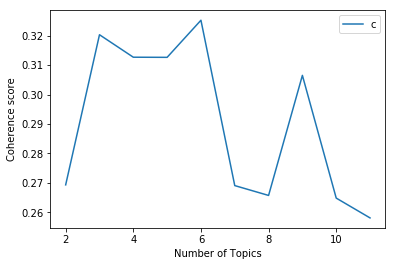

In [45]:
plot_graph(doc_clean,start,stop,step)